# Part I - (Prosper Loan Data)
## by (Olashile Olabamiji Fadipe)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
loan_df.shape

(113937, 81)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
'''examining the alphabetic prosper rating'''

loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [8]:
'''looking at the numeric prosper rating'''
loan_df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features of each loan including; loan amount, borrower rate (or interest rate), current loan status, borrower income with most variables being numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

I am interested in knowing what features affect loan status(outcome).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The Borrower's Annual Percentage Rate (APR), the Borrower's interest rate for the loan and Term of loan I think will help in determining the status of loan taken. 

## Univariate Exploration



#### Two functions to use mostly

In [9]:
# Setting a default color
color = sb.color_palette()[0]

In [13]:
#This function creates a vertical bar chart with percentage label on the bars
def ver_bar_chart(col_name):
    order= loan_df[col_name].value_counts().index
    employment_count = loan_df[col_name].value_counts()
    n_employment = loan_df[col_name].value_counts().sum()
    plt.figure(figsize=[20,10])
    color=sb.color_palette()[0]
    sb.countplot(data=loan_df, x= col_name, color=color, order=order)
    plt.xticks(rotation=90)
    plt.title(col_name+' chart')
    plt.ylabel('No of Borrowers');
    locs, labels = plt.xticks(rotation=90)
    
    for loc, label in zip(locs, labels):
        count = employment_count[label.get_text()]
        pct_string= '{:0.1f}%'.format(100*count/n_employment)
        plt.text(loc, count+2, pct_string, ha='center', color='black')

In [25]:
#This function creates a horizontal bar chart with percentage label on the bars
def hor_bar_chart(col_name):
    order= loan_df[col_name].value_counts().index
    employment_count = loan_df[col_name].value_counts()
    n_employment = loan_df[col_name].value_counts().sum()
    plt.figure(figsize=[10,25])
    color=sb.color_palette()[0]
    sb.countplot(data=loan_df, y=col_name, color=color, order=order)
    plt.title(col_name+' chart');
    #plt.ylabel('No of Borrowers');
    
    
    for l in range(employment_count.shape[0]):
        count = employment_count[l]
        pct_string= '{:0.1f}%'.format(100*count/n_employment)
        plt.text(count+2, l, pct_string, va='center', color='black')

In [35]:
#This function creates a histogram with grid lines
def histogram(col_name, binn):
    plt.figure(figsize=[10,5])
    plt.hist(data=loan_df, x=col_name, bins=binn)
    plt.grid()

In [56]:
#This function creates a bar chart
def plot(col_name):
    plt.figure(figsize=[10,5])
    sb.countplot(data=loan_df, x=col_name, color=color)
    plt.ylabel('No of Borrowers');

### Now we consider some of the loan features including the features of interest

> The charts below describes the distributions of some features of the loan data

### Loan Status
### What status has the highest percentage or number?
> According to the plot below, more of the loans taken are the ones still running/ongoing

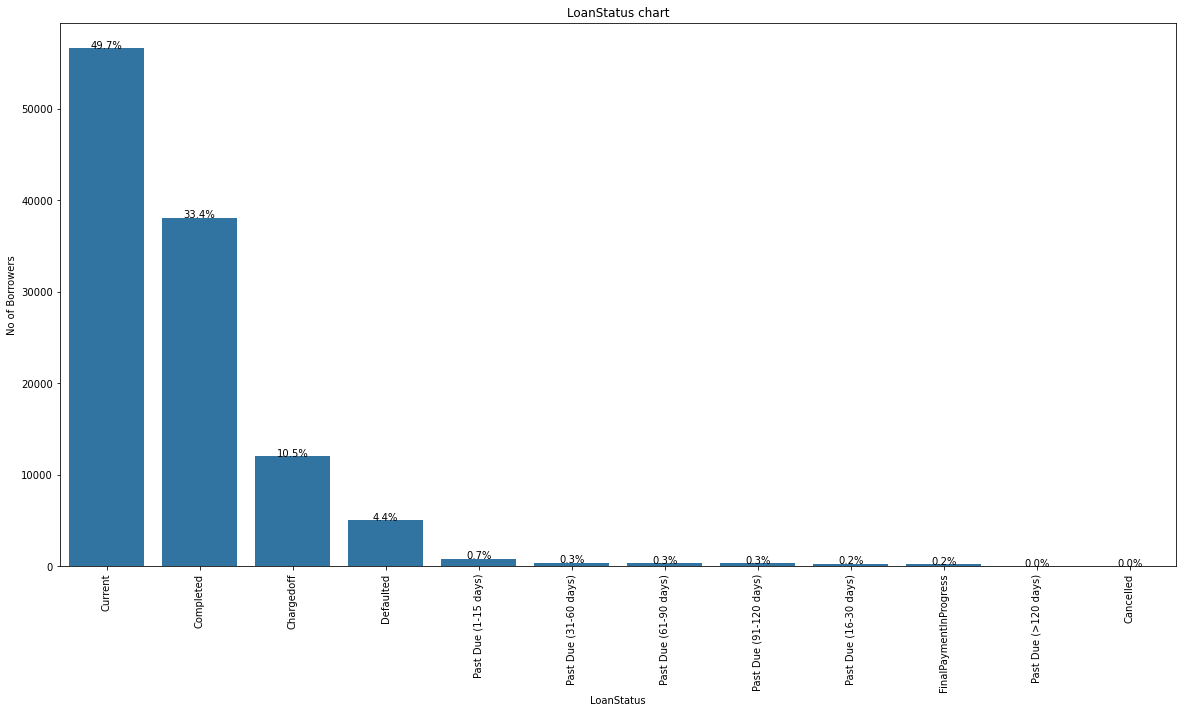

In [14]:
'''A bar chart of Loan Status'''
ver_bar_chart('LoanStatus')

## Borrower APR
### Which APR has the most number of borrowers?
> The borrower annual percentage rate plot is bimodal with peaks at APRs between 0.16-0.18 and 0.2-0.22 with the highest number of borrowers of over 10,000 

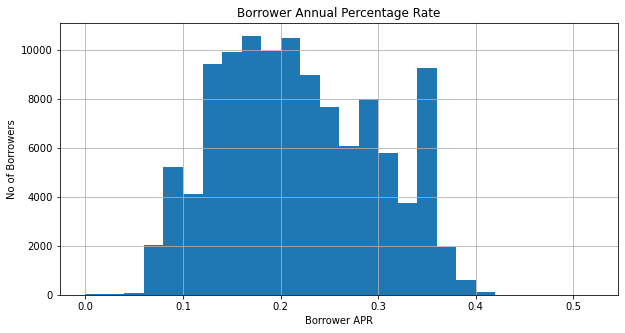

In [36]:
'''A histogram of borrower APR'''
#plt.figure(figsize=[10,5])
binn= np.arange(0,loan_df['BorrowerAPR'].max()+0.02,0.02)
histogram('BorrowerAPR', binn)
#plt.hist(data=loan_df, x='BorrowerAPR', bins=bins)
#plt.grid()
plt.title('Borrower Annual Percentage Rate')
plt.xlabel('Borrower APR')
plt.ylabel('No of Borrowers');

## Borrower Rate
### Which interest rate has the highest number of borrowers?
> The borrowers interest rates with the highest number of borrowers are between 0.14 and 0.16 with borrowers of over 12000

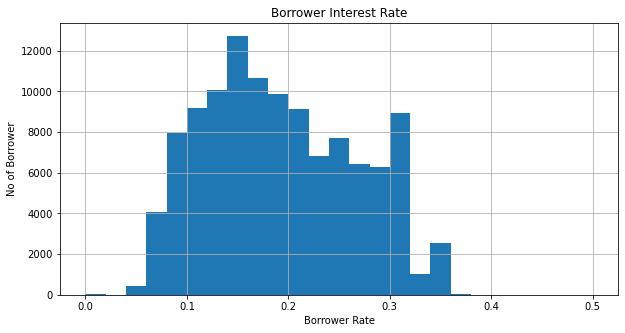

In [37]:
'''A histogram of borrower rate'''
#plt.figure(figsize=[10,5])
binn= np.arange(0,loan_df['BorrowerRate'].max()+0.02,0.02)
histogram('BorrowerRate', binn)
#plt.hist(data=loan_df, x='BorrowerRate', bins=bins)
#plt.grid()
plt.title('Borrower Interest Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('No of Borrower');

## Employment Status
### Which category of employment borrowed more?
> Exploration of the employment status reveals that employed people borrow more.

In [15]:
#comparing the frequencies of each value of the employment status column
loan_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

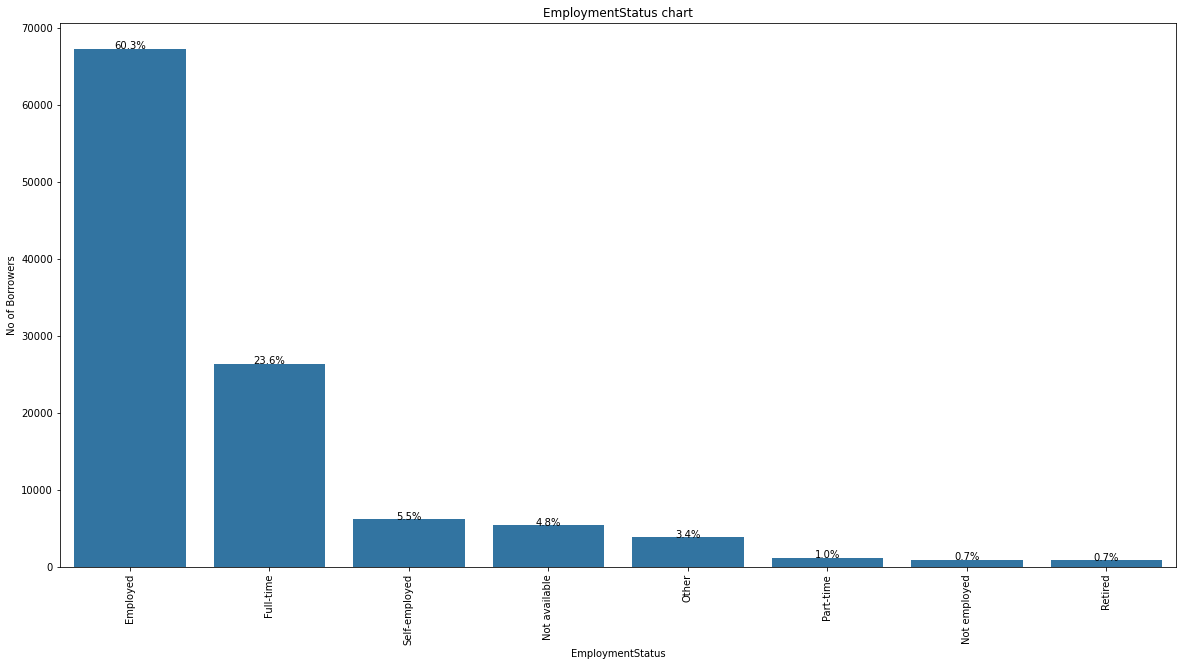

In [21]:
'''This is a bar chart of the employment status'''
ver_bar_chart('EmploymentStatus')

## Occupation
### More borrowers are in which occupation categories? 
> Borrowers who are in the Other category of occupation took more loans which is 25.9 percent of the of the total occupation

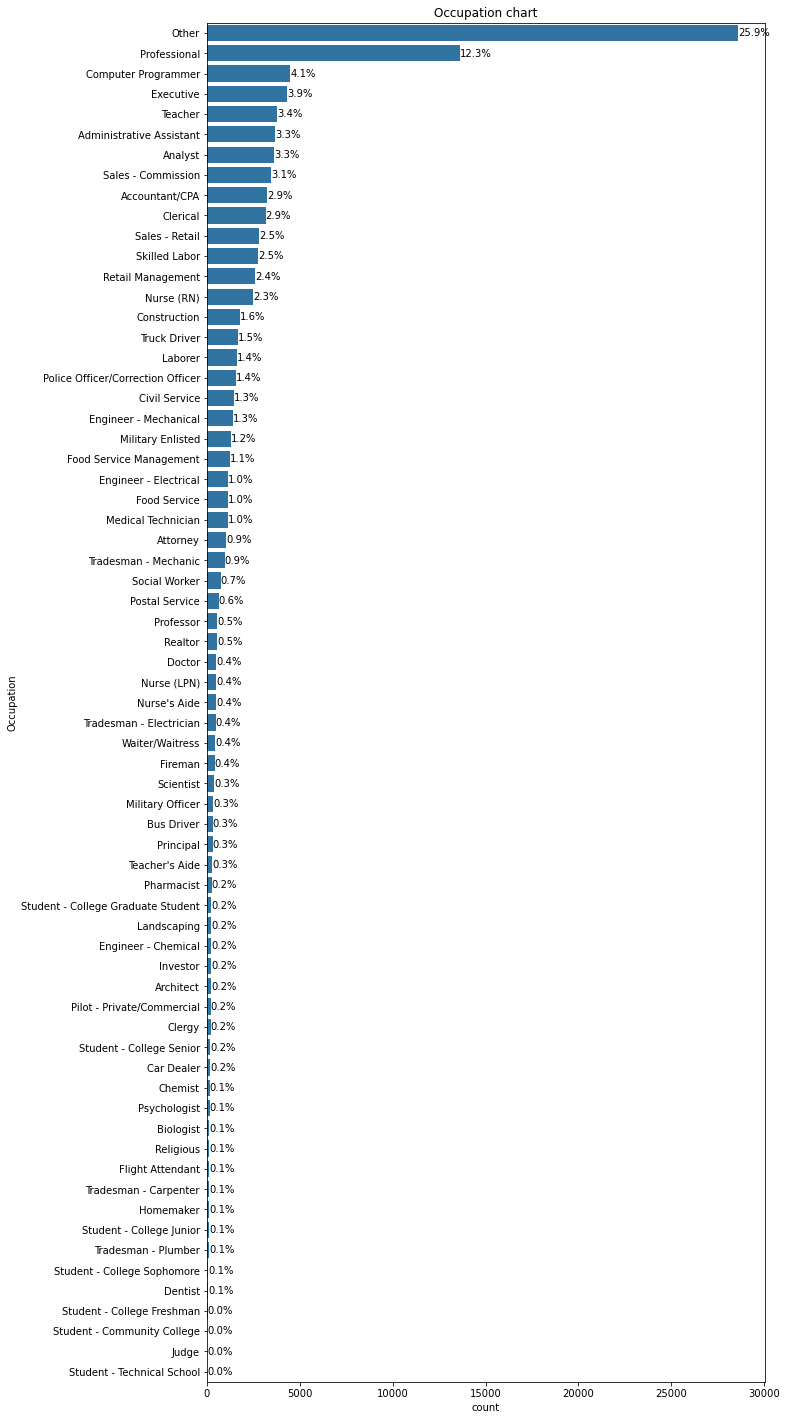

In [26]:
'''Plotting the occupation bar chart horizontally'''
hor_bar_chart('Occupation')

## Borrower State
### Where did most borrowers come from?
> Interestingly, more borrowers come from California

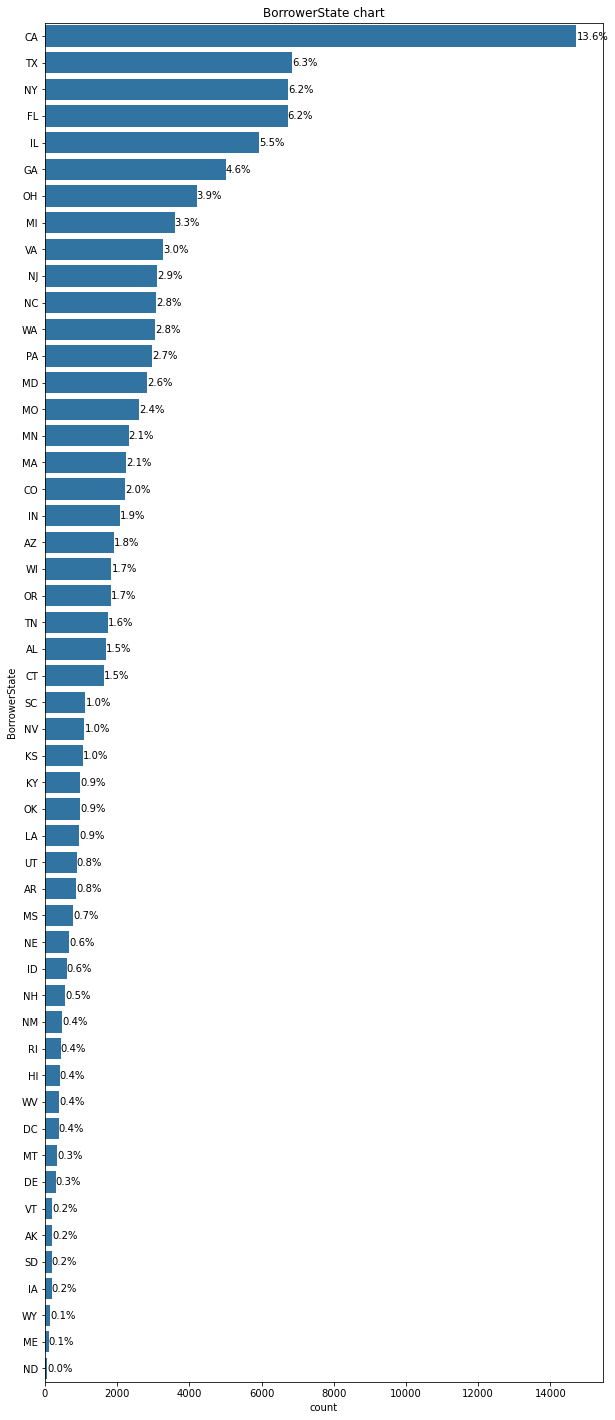

In [27]:
# A horizontal bar chart of states where borrowers come from
hor_bar_chart('BorrowerState')

## Is Borrow Home Owner
### Does being a property owner reduce chances of getting loans?
> From this plot, the number of borrowers who are home owners is higher than those who are not. However, the differece is not much as people with no property also get loans hence, being a property owner doesn't affect the chances of getting a loan.

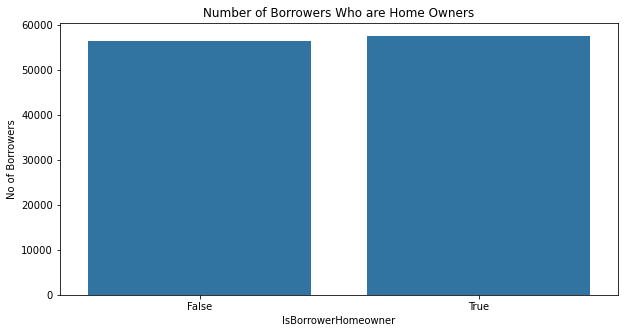

In [57]:
# A bar chart depicting number of borrowers with or without houses
plot('IsBorrowerHomeowner')
#sb.countplot(data=loan_df, x='IsBorrowerHomeowner', color=color)
plt.title('Number of Borrowers Who are Home Owners')
plt.ylabel('No of Borrowers');

## Original Loan Amount
### What was the most amount borrowed by borrowers?
> The plots of the original loan amount below showed that the loan amount that was mostly borrowed for is between 4750-5000

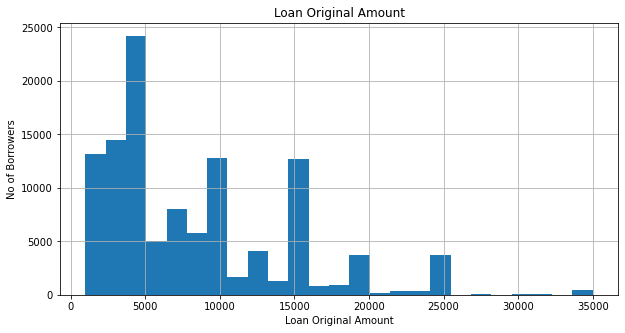

In [40]:
#This is plotting the original loan amount of borrowers
binn=25
histogram('LoanOriginalAmount', binn)
#plt.hist(data=loan_df, x='LoanOriginalAmount', bins=25)
#plt.grid()
plt.title('Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('No of Borrowers');

## Monthly Loan Payment
### What is the range of amount being paid back monthly by most borrowers?
> Looking at the monthly loan payment, the plot below reveals that most of the borrowers pay back 150 monthly

In [27]:
#A view of monthly repayments
loan_df['MonthlyLoanPayment']

0         330.43
1         318.93
2         123.32
3         321.45
4         563.97
           ...  
113932    364.74
113933     65.57
113934    273.35
113935    449.55
113936     64.90
Name: MonthlyLoanPayment, Length: 113937, dtype: float64

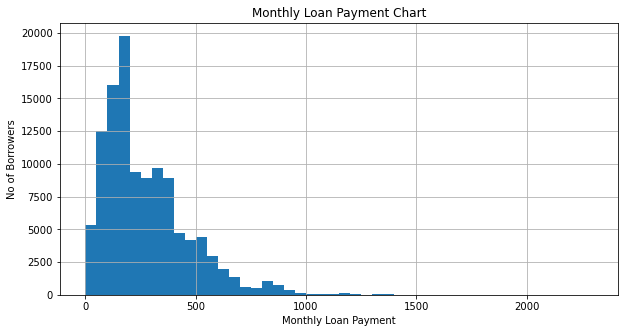

In [41]:
#A plot of the monthly loan repayment
binn= np.arange(0,loan_df['MonthlyLoanPayment'].max()+50,50)
histogram('MonthlyLoanPayment', binn)
plt.title('Monthly Loan Payment Chart')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('No of Borrowers');

## Stated Monthly Income
### How much do most borrowers earn?
> The plot for stated monthly income shows that most borrowers earn 4000 monthly 

In [29]:
# View of the stated monthly income
loan_df['StatedMonthlyIncome'].value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

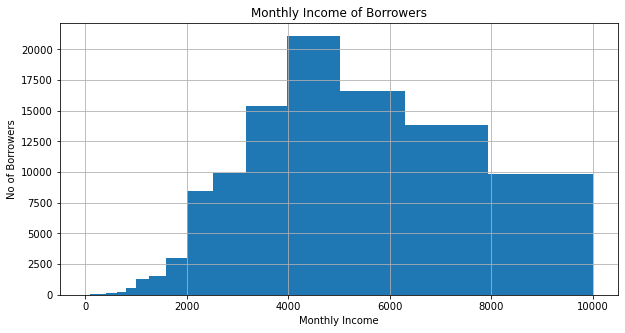

In [42]:
#Plotting the stated monthly incomes
binn= 10**np.arange(0, 4.0+0.1, 0.1)
histogram('StatedMonthlyIncome', binn)
plt.title('Monthly Income of Borrowers')
plt.xlabel('Monthly Income')
plt.ylabel('No of Borrowers');
#plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=bins);


## Loan Month Since Origination
### How many month loan do borrowers take?
> This plot shows that more short term loans are taken within 1 month and 5 months compared to long term loans

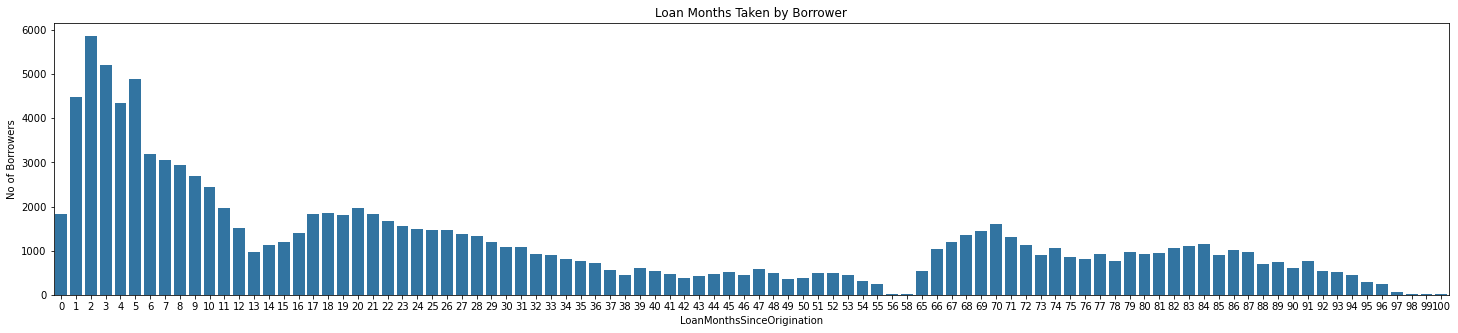

In [50]:
#Taking a look at the loan months since origination of prosper 
plt.figure(figsize=[25,5])
plot('LoanMonthsSinceOrigination')
plt.title('Loan Months Taken by Borrower')
plt.ylabel('No of Borrowers');
#plt.xticks(rotation=45);

## Now I look at the Prosper Score
### Do borrowers take risky loans?
> From the chart below, most borrowers went for the risky kind of loan

In [35]:
#A view of the prosper score, highest being 11 and lowest 1
loan_df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

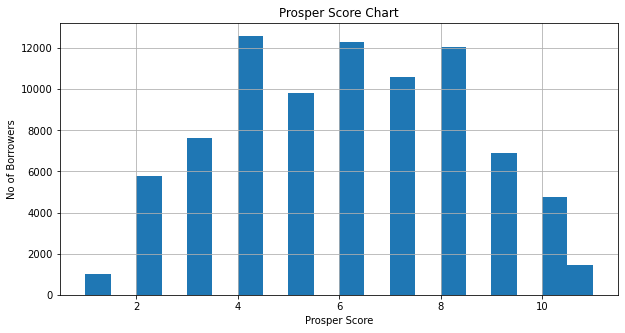

In [54]:
#Plotting the prosper score chart showing 4 slightly higher than 6 and 8
#loan_df['ProsperScore'].hist()
binn=20
histogram('ProsperScore', binn)
plt.title('Prosper Score Chart')
plt.xlabel('Prosper Score')
plt.ylabel('No of Borrowers');

## Term of Loan
### How long do borrowers take loan for?
> Plotting the Term of loan reveals that most borrowers opted for the medium term loans

In [37]:
#A view of the loan term 
loan_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

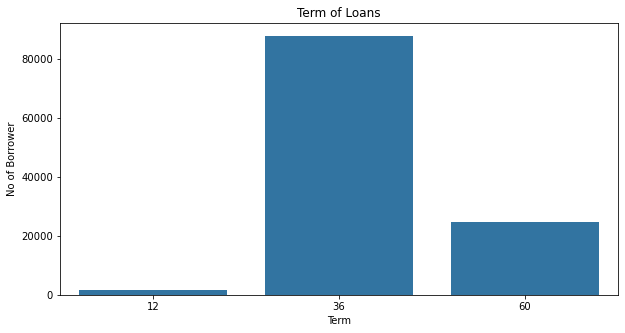

In [58]:
#Plotting loan term chart
plot('Term')
plt.title('Term of Loans')
plt.ylabel('No of Borrower');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not have to do any transformation on my variables of interest. However, I would like to point out that more of loan takers are employed people. Also, more borrowers took loans with low interest rates which translates to the low annual percentage rates.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did not find any unusual distribution in the features I investigated

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Comparing Borrowers APR with loan Term

### Which of the loan terms has the highest APRs?

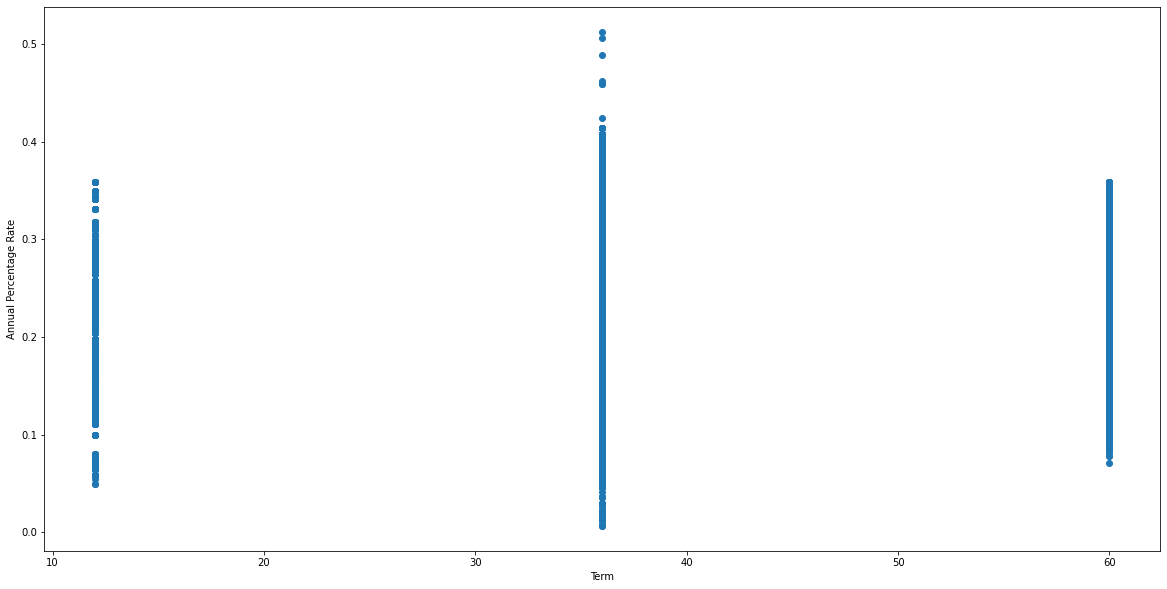

In [39]:
#a scatter plot of Borrowers APR and Term 
plt.figure(figsize=[20,10])
plt.scatter(data=loan_df, y='BorrowerAPR', x='Term')
plt.ylabel('Annual Percentage Rate')
plt.xlabel('Term');

> The plot above shows why more borrowers opted for the 36 term loans as it has more APRs

## Prosper Rating versus Borrower Rate

### Which Interest rates are rated highly?

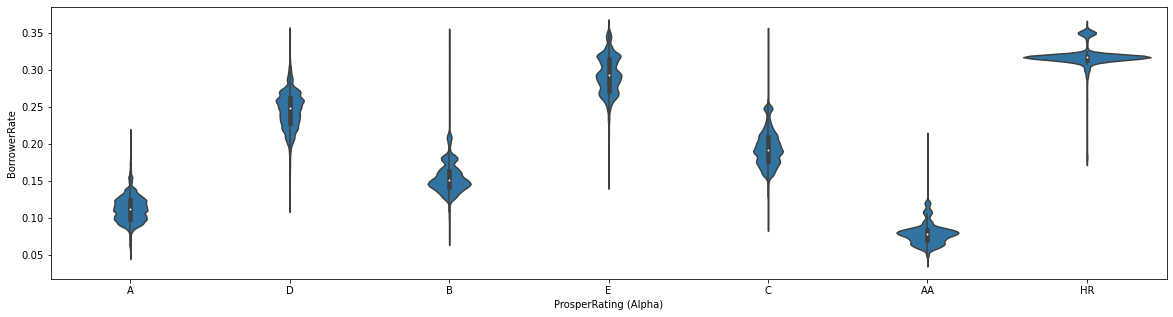

In [40]:
#A violin plot of borrower rate againgst prosper rating 
plt.figure(figsize=[20,5])
sb.violinplot(data=loan_df, y= 'BorrowerRate', x= 'ProsperRating (Alpha)', color=color)
plt.ylabel('BorrowerRate')
plt.xlabel('ProsperRating (Alpha)');

> The plot above reveals that lower borrower interest rates are rated highly

## Borrower APR vs Loan Status

### How does borrower annual percentage rate affect loan status?

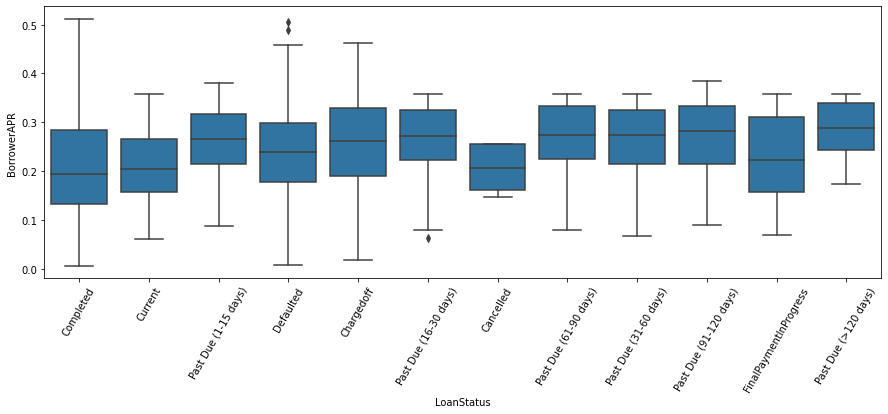

In [41]:
#box plot of loan status and borrower APR
plt.figure(figsize=[15,5])
sb.boxplot(data=loan_df, x='LoanStatus', y='BorrowerAPR', color=color)
plt.xticks(rotation=60);

> The plot above shows that loans completed have an average annual percentage rate of 0.2. I guess the low rate made it easy to get the loans completed.

## Loan Status versus Is Borrower Homeowner

### How does being an home owner affect loan status?

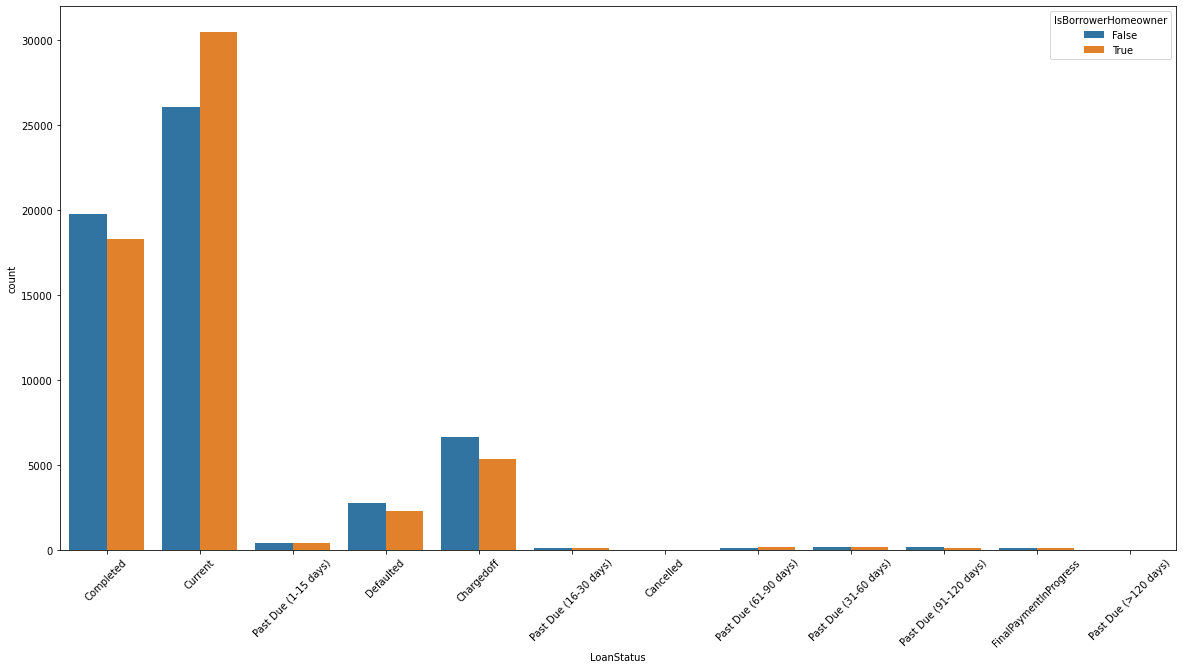

In [42]:
#Plotting Loan Status and Is borrower home owner
plt.figure(figsize=[20,10])
sb.countplot(data=loan_df, x='LoanStatus', hue='IsBorrowerHomeowner')
plt.xticks(rotation=45);

> From the above chart, one can infer that being an home owner does not affect the status of the loan

## Loan Status against Term

### How does loan term affect loan outcome?

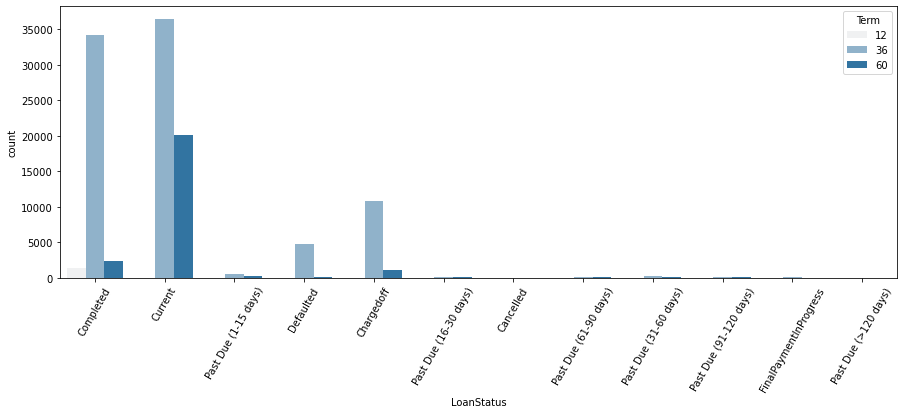

In [43]:
#comparing the effect loan term has on loan status
plt.figure(figsize=[15,5])
sb.countplot(data=loan_df, x='LoanStatus', hue='Term', color=color)
plt.xticks(rotation=60);

> From the plot above the loan terms did not have any effect on loan status however, the plot confirmed earlier stated inference that most borrowers opted for the mid term loan of 36 months.

## Prosper Score against Recommendations

### Which risk level type was recommended most?

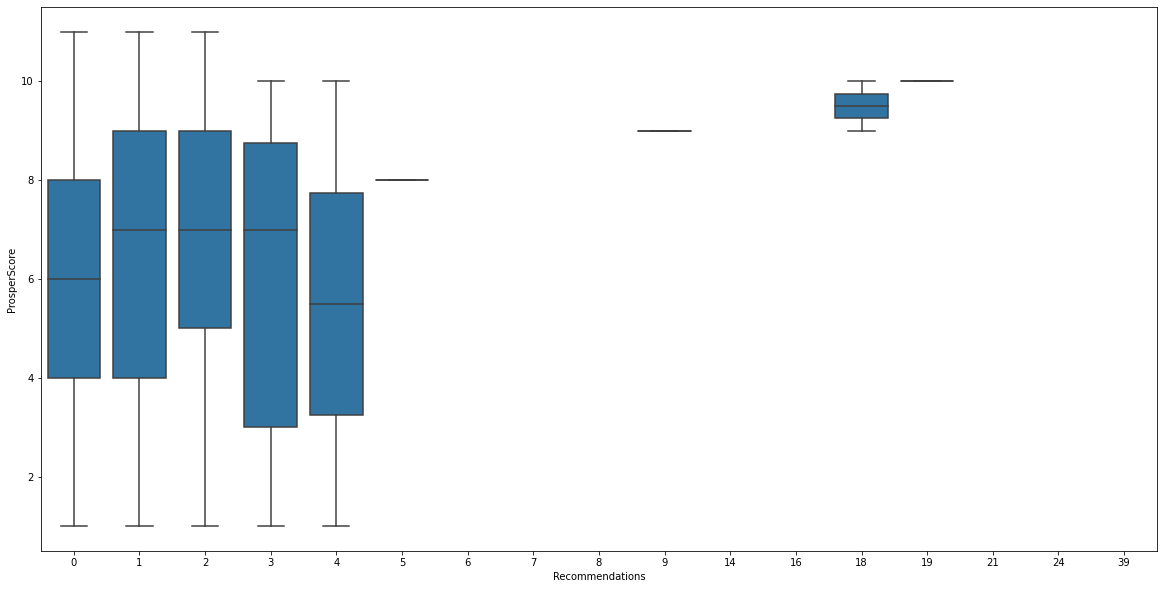

In [59]:
plt.figure(figsize=[20,10])
sb.boxplot(data=loan_df, y='ProsperScore', x='Recommendations', color=color);

> From the plot of prosper score against recommendations, the loan with scores between 9 and 11 had the most recommendations (9 and above). That is, people prefare the least risky kind of of loan, which is no surprise! 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was no relationship between the status of loans and whether a borrower is a home owner.
> Term of loan also did not have effect on loan status and
> Completed loans have an average of 20% Borrower APR


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that  most people are really afraid of the risky loans as most of the recommendations were for the least risky  loans

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> To investigate the Prosper data futher, I will now plot Loan Status, Borrower APR and Borrower Interest Rate using a scatter plot to really observe the effect APR and Interest Rate have on the outcome of loans

## Loan Status vs Borrower APR vs Borrower Rate

### How do Borrower APR and Borrower Rate affect Loan Status?

In [67]:
loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

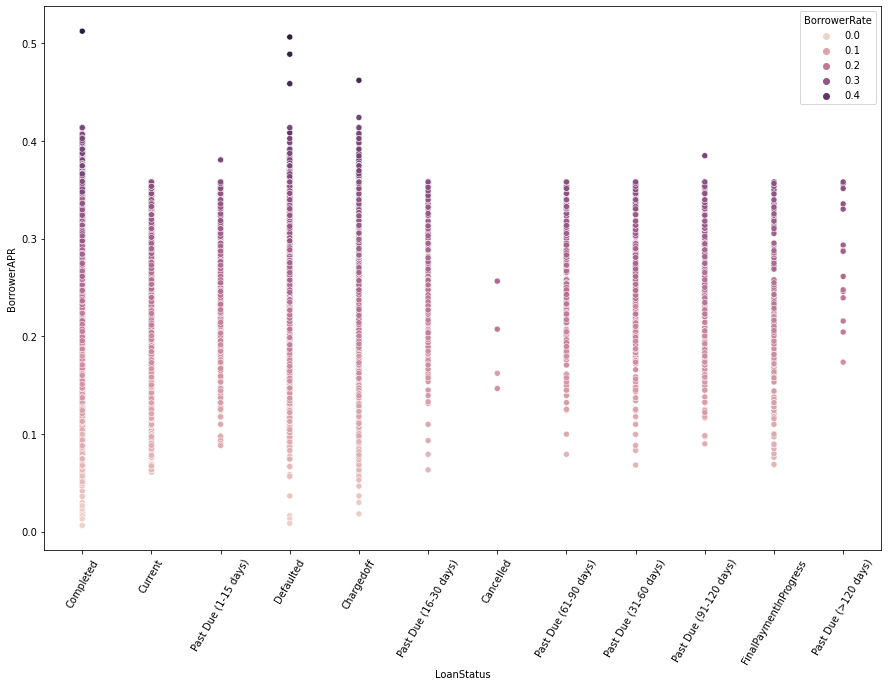

In [74]:
plt.figure(figsize=[15, 10])
sb.scatterplot(data=loan_df, x='LoanStatus', y='BorrowerAPR', hue='BorrowerRate')
plt.xticks(rotation=60);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the plot above, more of the completed loans have low borrowers annual percentage rate and borrowers interest rate.

### Were there any interesting or surprising interactions between features?

> Cancelled loans have APRs between 0.12 and 0.26 with Rates between 0.0 and 0.2

## Conclusions

> From the explorations above, I think it is safe to say that Borrowers Annual Percentage Rates and Borrowers Interest Rates have effects in determining the completion of a loan- howbeit little, since loan status(excluding completed ones) do not have low APRs.
